<a href="https://colab.research.google.com/github/joyinning/python_practice_business_analysis/blob/main/Treadmill_Buyer_Profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resource: https://platform.stratascratch.com/data-projects/treadmill-buyer-profile

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.



Product Portfolio:

1. The KP281 is an entry-level treadmill that sells for 1,500 dollars.
2. The KP481 is for mid-level runners and sells for 1,750 dollars.
3. The KP781 treadmill is having advanced features and it sells for 2,500 dollars.

In [6]:
import pandas as pd
df = pd.read_csv("/content/aerofit_treadmill_data.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


1. Product - product purchased: KP281, KP481, or KP781
2. Age - in years
3. Gender - male/female
4. Education - in years
5. MaritalStatus - single or partnered
6. Usage - the average number of times the customer plans to use the treadmill each week
7. Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
8. Income - annual income in US dollars
9. Miles - the average number of miles the customer expects to walk/run each week


## General Analysis

In [7]:
df.shape

(180, 9)

In [8]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Convert object to category type**

In [9]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


**Statistical Summary**

In [11]:
int64_columns = df.select_dtypes(include = 'int64')
int64_columns.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [12]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Missing Value/Duplicates Detection**

In [13]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [14]:
df.duplicated(subset = None, keep = 'first').sum()

0

**Conclusion**
1. Product Distribution
> There are 3 unique products with KP281 being the most frequent (80 out of 180 entires), suggesting it is a popular product among the sample.
2. Age
> The average age of the participants is approximately 28.79 years with a standard deviation of 6.94 years. The age range from 18 to 50 years, indicating a relatively young demographic. The distribution is slightly right-skewed as the mean is higher than the median.
3. Gender
> There are 2 unique genders with Male being more frequent (104 out of 180 entries, indicating a gender imbalance with more male participates.
4. Education
> The average years of education is approximately 15.57 years with a standard deviation of 1.62 years. The education ranges from 12 to 21 years, indicating most participants have at least completed high school, with many having some college or unversity education.
5. Marital Status
> There are 2 unique marital statuses with Partnered being the more frequent status (107 out of 180 entires), suggesting a higher proportion of partnered individuals in the sample.
6. Usage
> The average usage is approximately 3.46 with a standard deviation of 1.08. The usage ranges from 2 to 7, indicating a fairly wide range of usage levels.
7. Fitness
> The average fitness level is approximately 3.31 with a standard deviation of 0.96. The fitness level ranges from 1 to 5, suggesting varying levels of fitness among participants.
8. Income
> The average income is approximately $53,719.58 with a standard deviation of $16,506.68. The income ranges from $29,562 to $104,581, indicating a broad range of income levels.
The distribution is slightly right-skewed as the mean (53,719.58) is higher than the median (50,596.50).
9. Miles
> The average miles is approximately 103.19 with a standard deviation of 51.86. The miles range from 21 to 360, indicating a very wide range of miles. The distribution is likely right-skewed as the mean (103.19) is higher than the median (94).

## Graphical Analysis

**Univariate Analysis - Numerical Variables**

Distance Plot

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-fbd7c6d98fa7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde = True, ax = axis[0,0])
<ipython-input-16-fbd7c6d98fa7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Education'], kde = True, ax = axis[0,1])
<ipython-input-16-fbd7c6d98fa7>:6: UserWarning: 



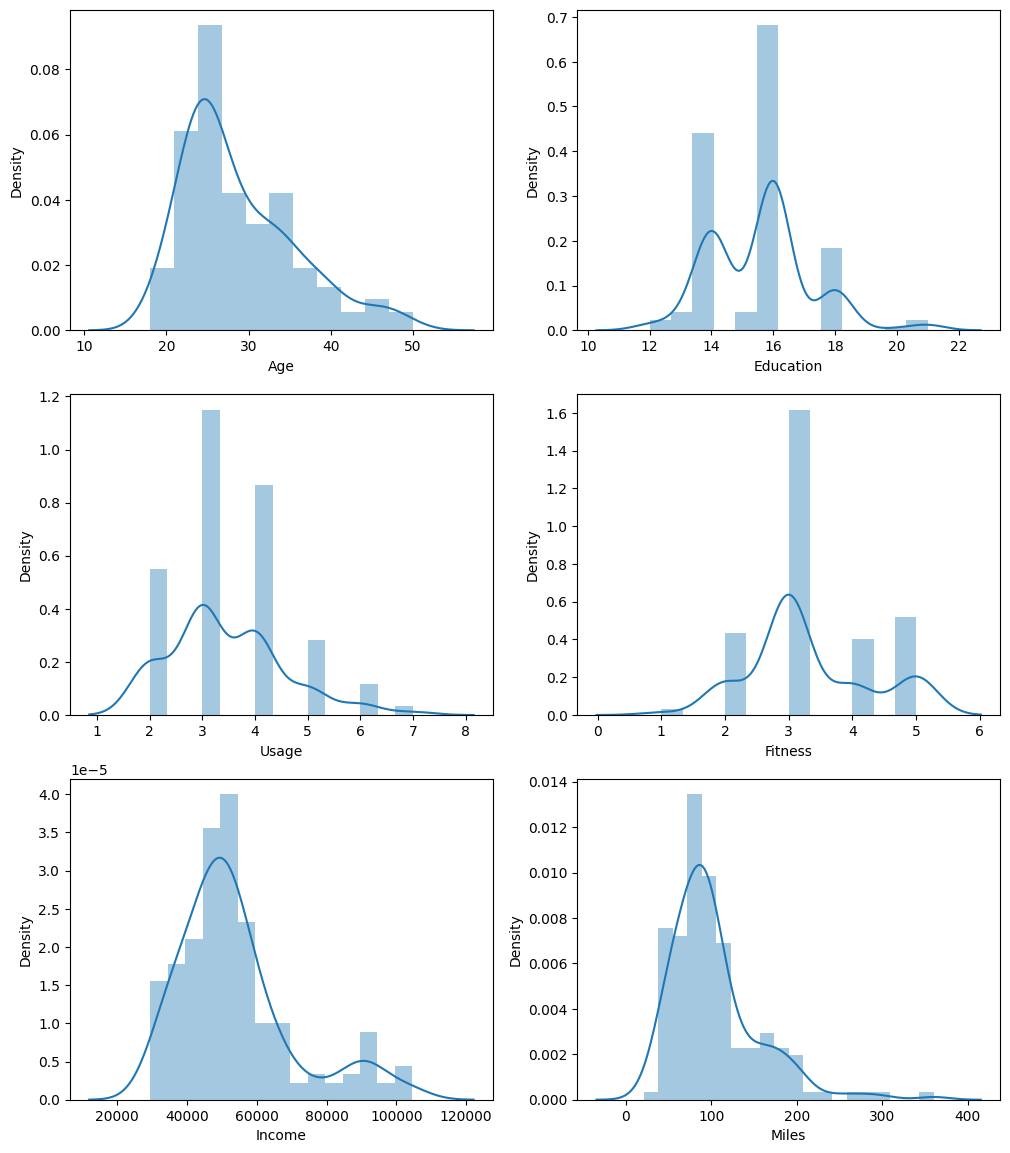

In [16]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
fig.subplots_adjust(top = 1.2)

sns.distplot(df['Age'], kde = True, ax = axis[0,0])
sns.distplot(df['Education'], kde = True, ax = axis[0,1])
sns.distplot(df['Usage'], kde = True, ax = axis[1,0])
sns.distplot(df['Fitness'], kde = True, ax = axis[1,1])
sns.distplot(df['Income'], kde = True, ax = axis[2,0])
sns.distplot(df['Miles'], kde = True, ax = axis[2,1])
plt.show()

1. Both Miles and Income have significant outliers based on the above distribution.
2. Both Miles and Income are right-skewed distribution which means the mass of the distribution is concentrated on the left of the figure.
3. Customer with fitness level 3 buy a major chuck of treadmills.
4. Majority of Customers fall within the $45,000 - $60,000 income range.

Count Plot

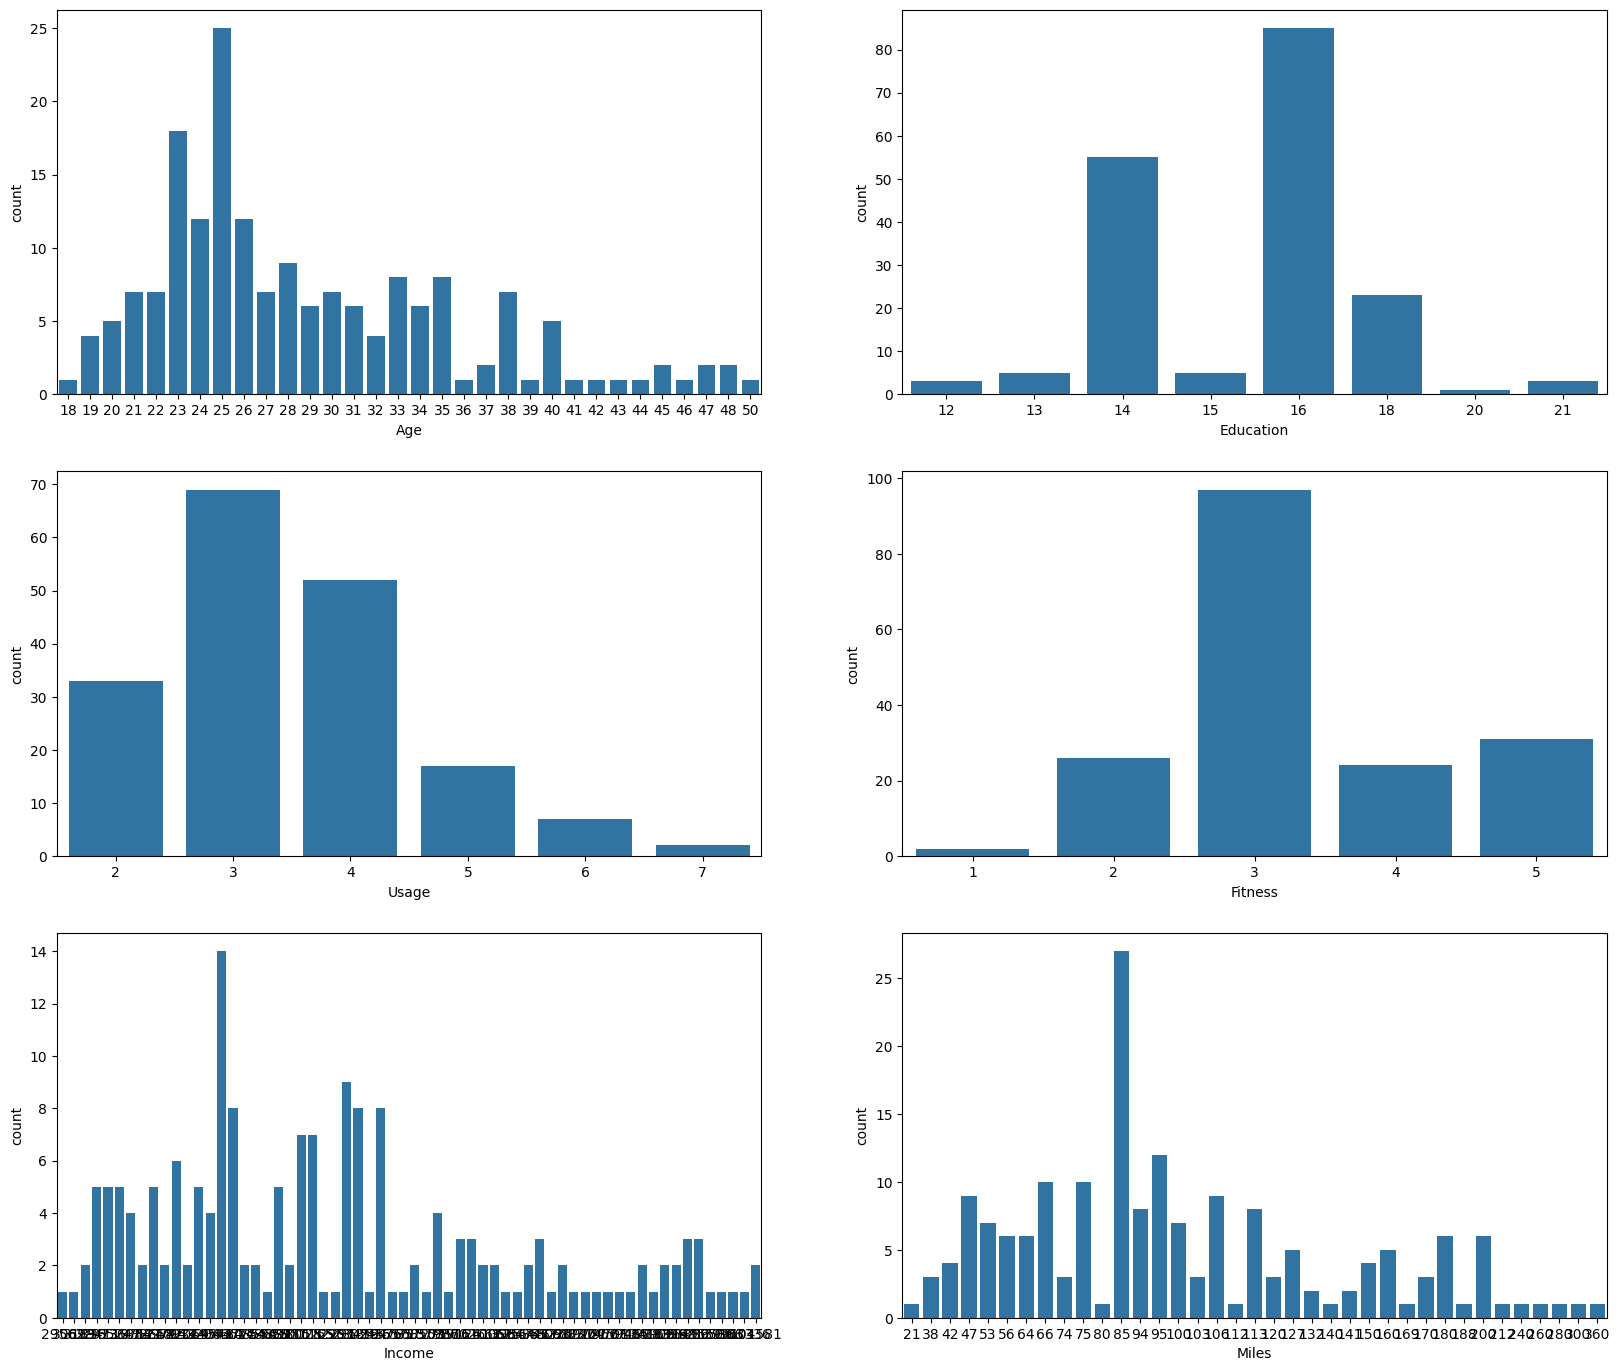

In [17]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 12))
fig.subplots_adjust(top = 1.2)

sns.countplot(data = df, x = "Age", ax = axis[0,0])
sns.countplot(data = df, x = "Education", ax = axis[0,1])
sns.countplot(data = df, x = "Usage", ax = axis[1,0])
sns.countplot(data = df, x = "Fitness", ax = axis[1,1])
sns.countplot(data = df, x = "Income", ax = axis[2,0])
sns.countplot(data = df, x = "Miles", ax = axis[2,1])
plt.show()

- Young people at age of 25 are more conscious about health and are using treadmills more than old aged people.

Box Plot

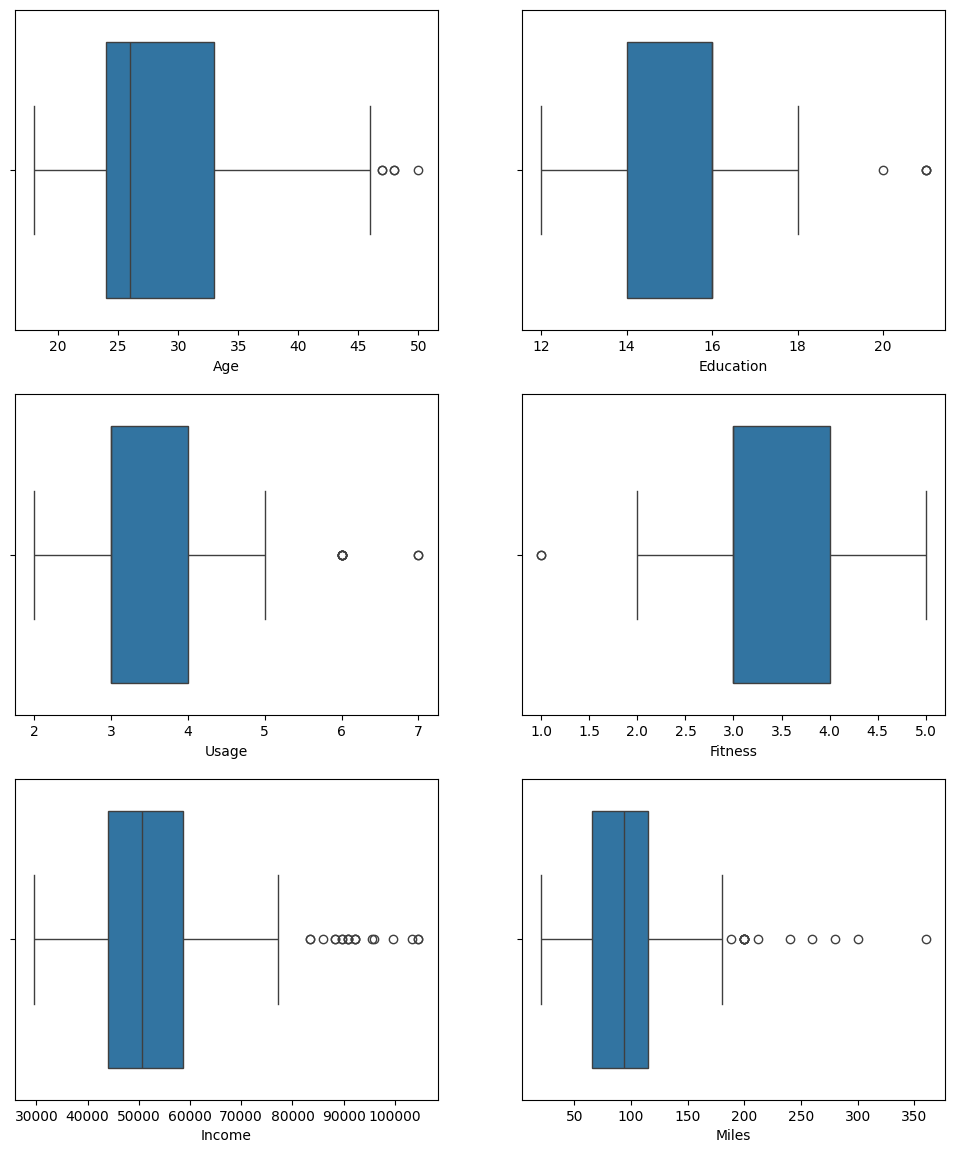

In [18]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
fig.subplots_adjust(top = 1.2)

sns.boxplot(data = df, x = "Age", orient = 'h', ax = axis[0,0])
sns.boxplot(data = df, x = "Education", orient = 'h', ax = axis[0,1])
sns.boxplot(data = df, x = "Usage", orient = 'h', ax = axis[1,0])
sns.boxplot(data = df, x = "Fitness", orient = 'h', ax = axis[1,1])
sns.boxplot(data = df, x = "Income", orient = 'h', ax = axis[2,0])
sns.boxplot(data = df, x = "Miles", orient = 'h', ax = axis[2,1])
plt.show()

1. Age, Education, and Usage have very few outliers.
2. While Income and Miles have more outliers.

**Univariate Analysis - Categorical Variables**

Count Plot

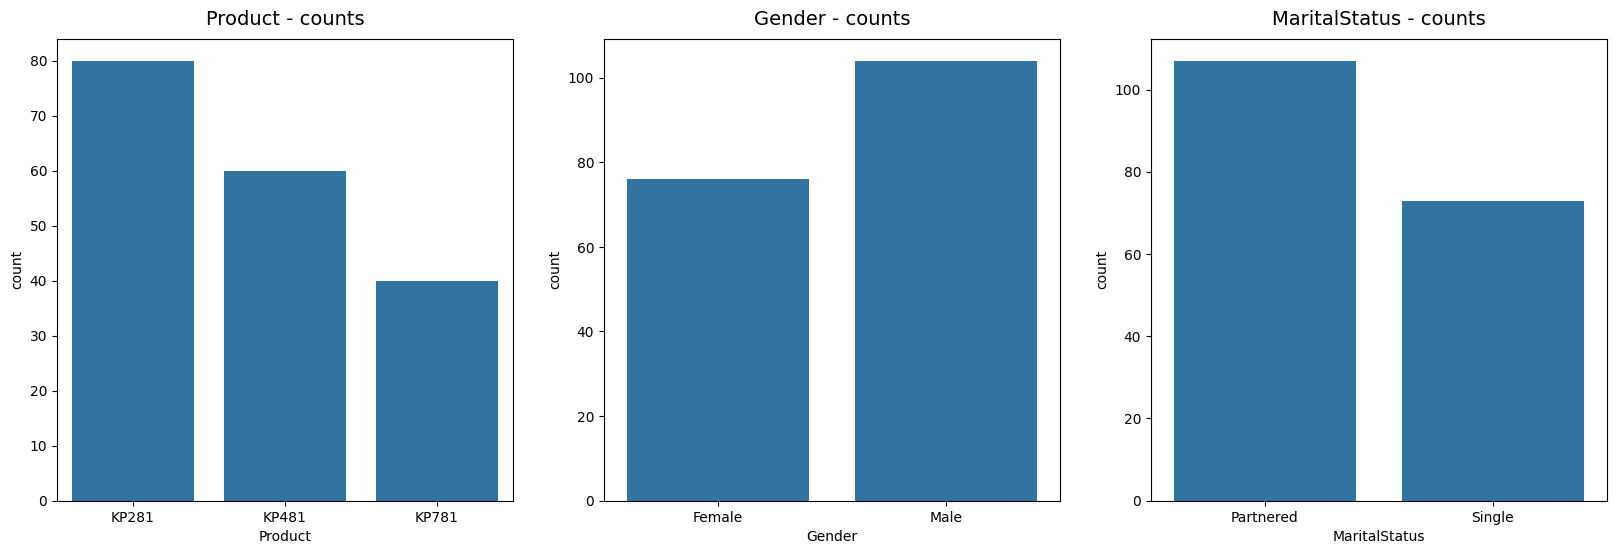

In [19]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))
sns.countplot(data = df, x = 'Product', ax = axs[0])
sns.countplot(data = df, x = 'Gender', ax = axs[1])
sns.countplot(data = df, x = 'MaritalStatus', ax = axs[2])

axs[0].set_title("Product - counts", pad = 10, fontsize = 14)
axs[1].set_title("Gender - counts", pad = 10, fontsize = 14)
axs[2].set_title("MaritalStatus - counts", pad = 10, fontsize = 14)
plt.show()

1. KP281 is the most frequent product and best-selling product.
2. In Gender, there are more Males who are using treadmills than Females.
3. The treadmills are more likely to be purchased by partnered people.

**Bivariate Analysis**

Checking if features have any effect on the product purchased.

Count Plot

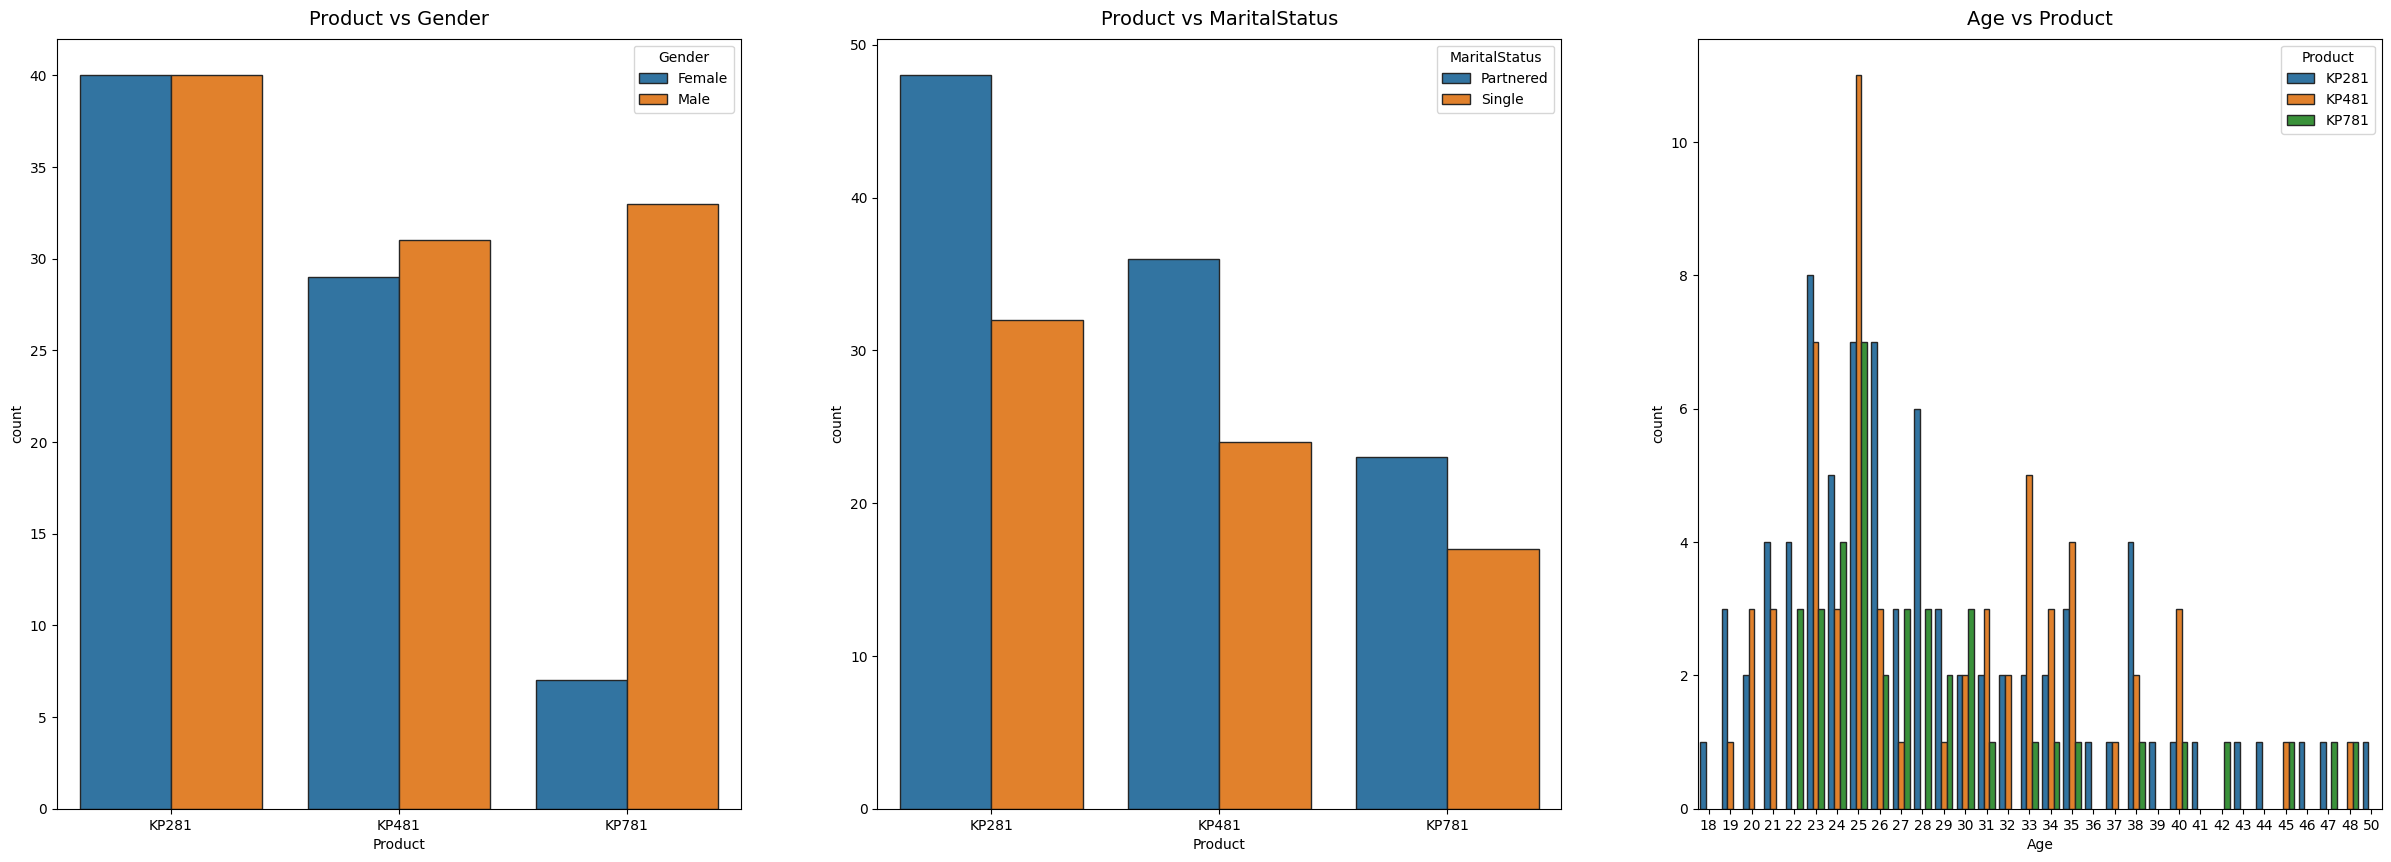

In [20]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))
sns.countplot(data = df, x = 'Product', hue = 'Gender', edgecolor = '0.15', ax = axs[0])
sns.countplot(data = df, x = 'Product', hue = 'MaritalStatus', edgecolor = '0.15', ax = axs[1])
sns.countplot(data = df, x = 'Age', hue = 'Product', edgecolor = '0.15', ax = axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
axs[2].set_title("Age vs Product", pad=10, fontsize=14)
plt.show()

1. Product vs Gender: Equal number of males and feamles have purchased KP281 product and almost same for the product KP481. Most of the male customers have purchased the KP781 product.
2. Product vs MaritalStatus: Customer who is Partnered, is more likely to purchase the product.
3. Age vs Product: Customers with age of 25 are more likely to purchase the KP481 product.



Box Plot

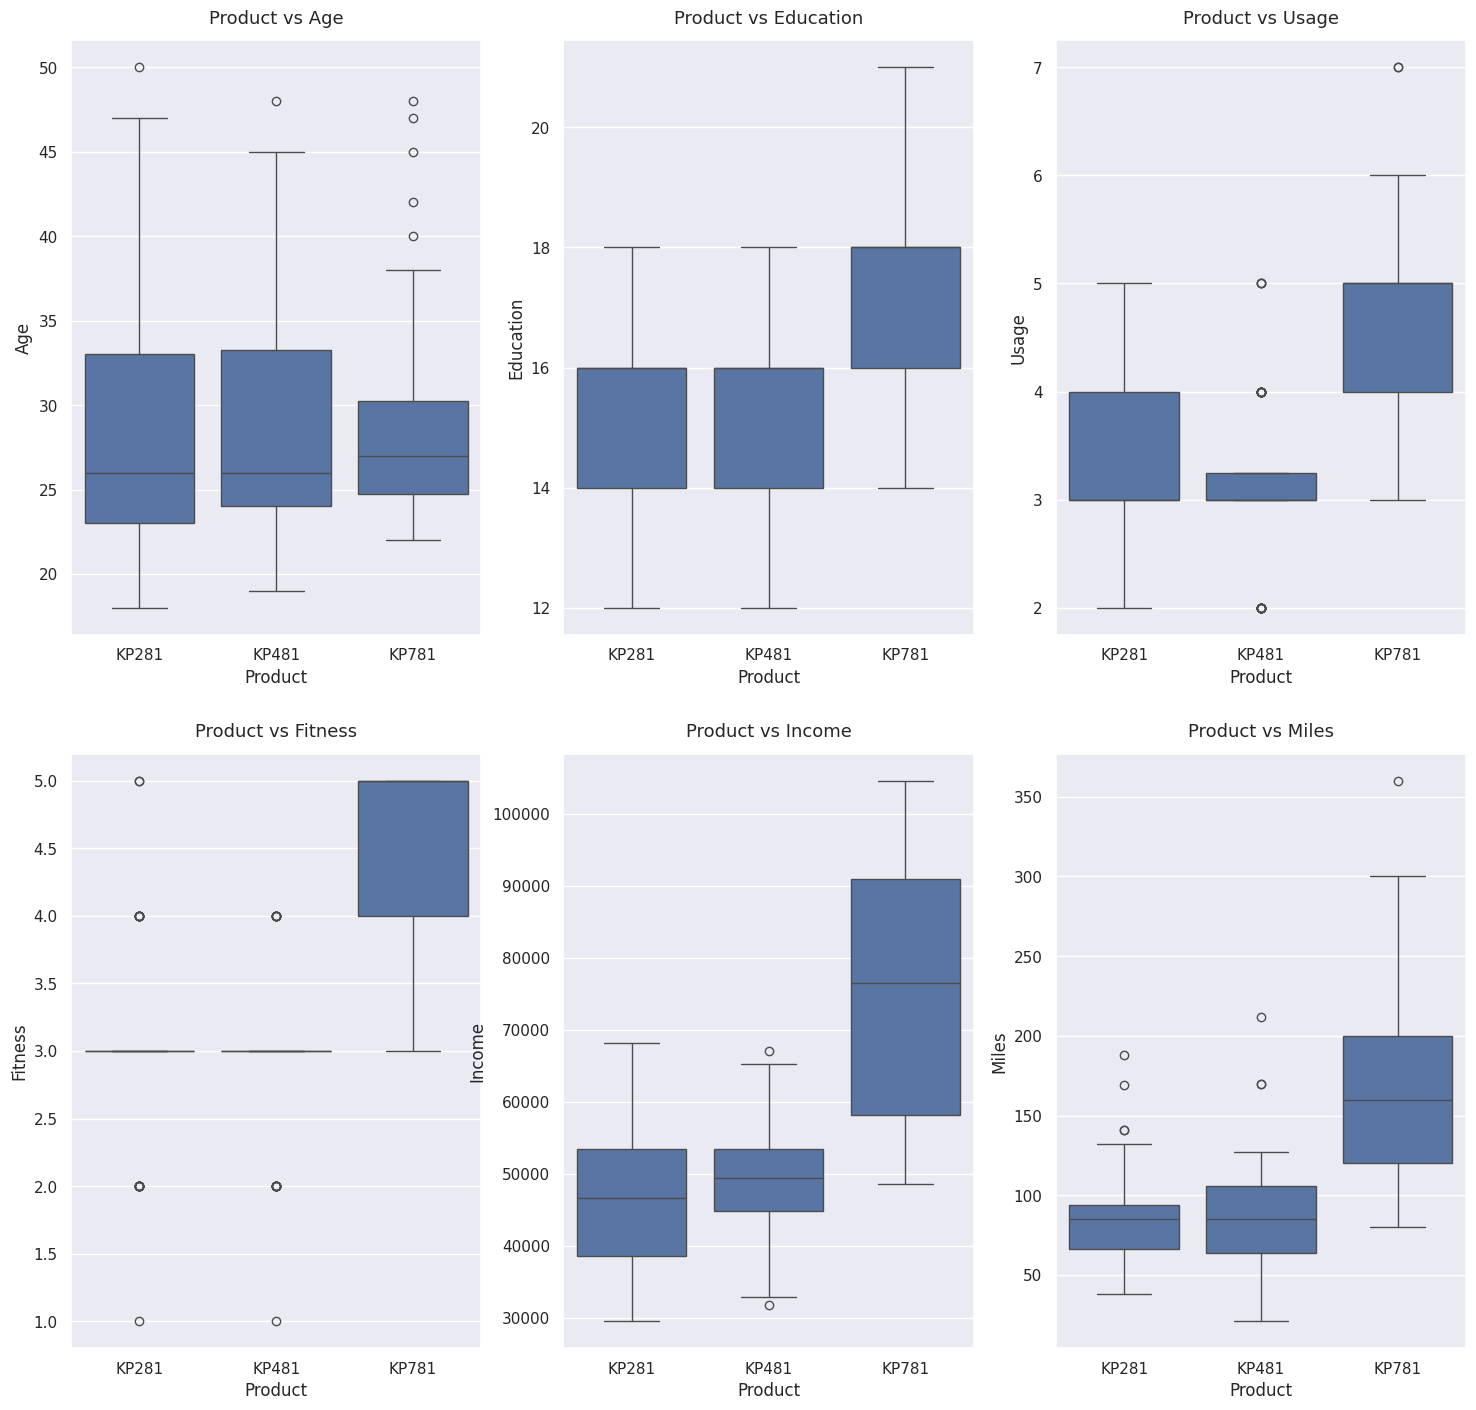

In [21]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 12))
fig.subplots_adjust(top = 1.2)

count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data = df, x = 'Product', y = attributes[count], ax = axs[i, j])
        axs[i, j].set_title(f"Product vs {attributes[count]}", pad = 12, fontsize = 13)
        count += 1

1. **Product vs Age**: Customers purchasing products KP281 & KP481 are having same Age median value. Customers whose age lies between 25-30, are more likely to buy the KP781 product.
2. **Product vs Education**: Customers whose Education is greater than 16, have more changes to purchase the KP781 product. While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
3. **Product vs Usage**: Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product. While the other customers are likely to purchase KP281 or KP481.
4. **Product vs Fitness**: The more the customers is fit (fitness >= 3), the higher the chances of the customer purchasing the KP781 product.
5. **Product vs Income**: The higher the Income of the customer (Income >= 60000), the higher the chance of the customer purchasing the KP781 product.
6. **Product vs Miles**: If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy the KP781 product.

**Multivariate Analysis**

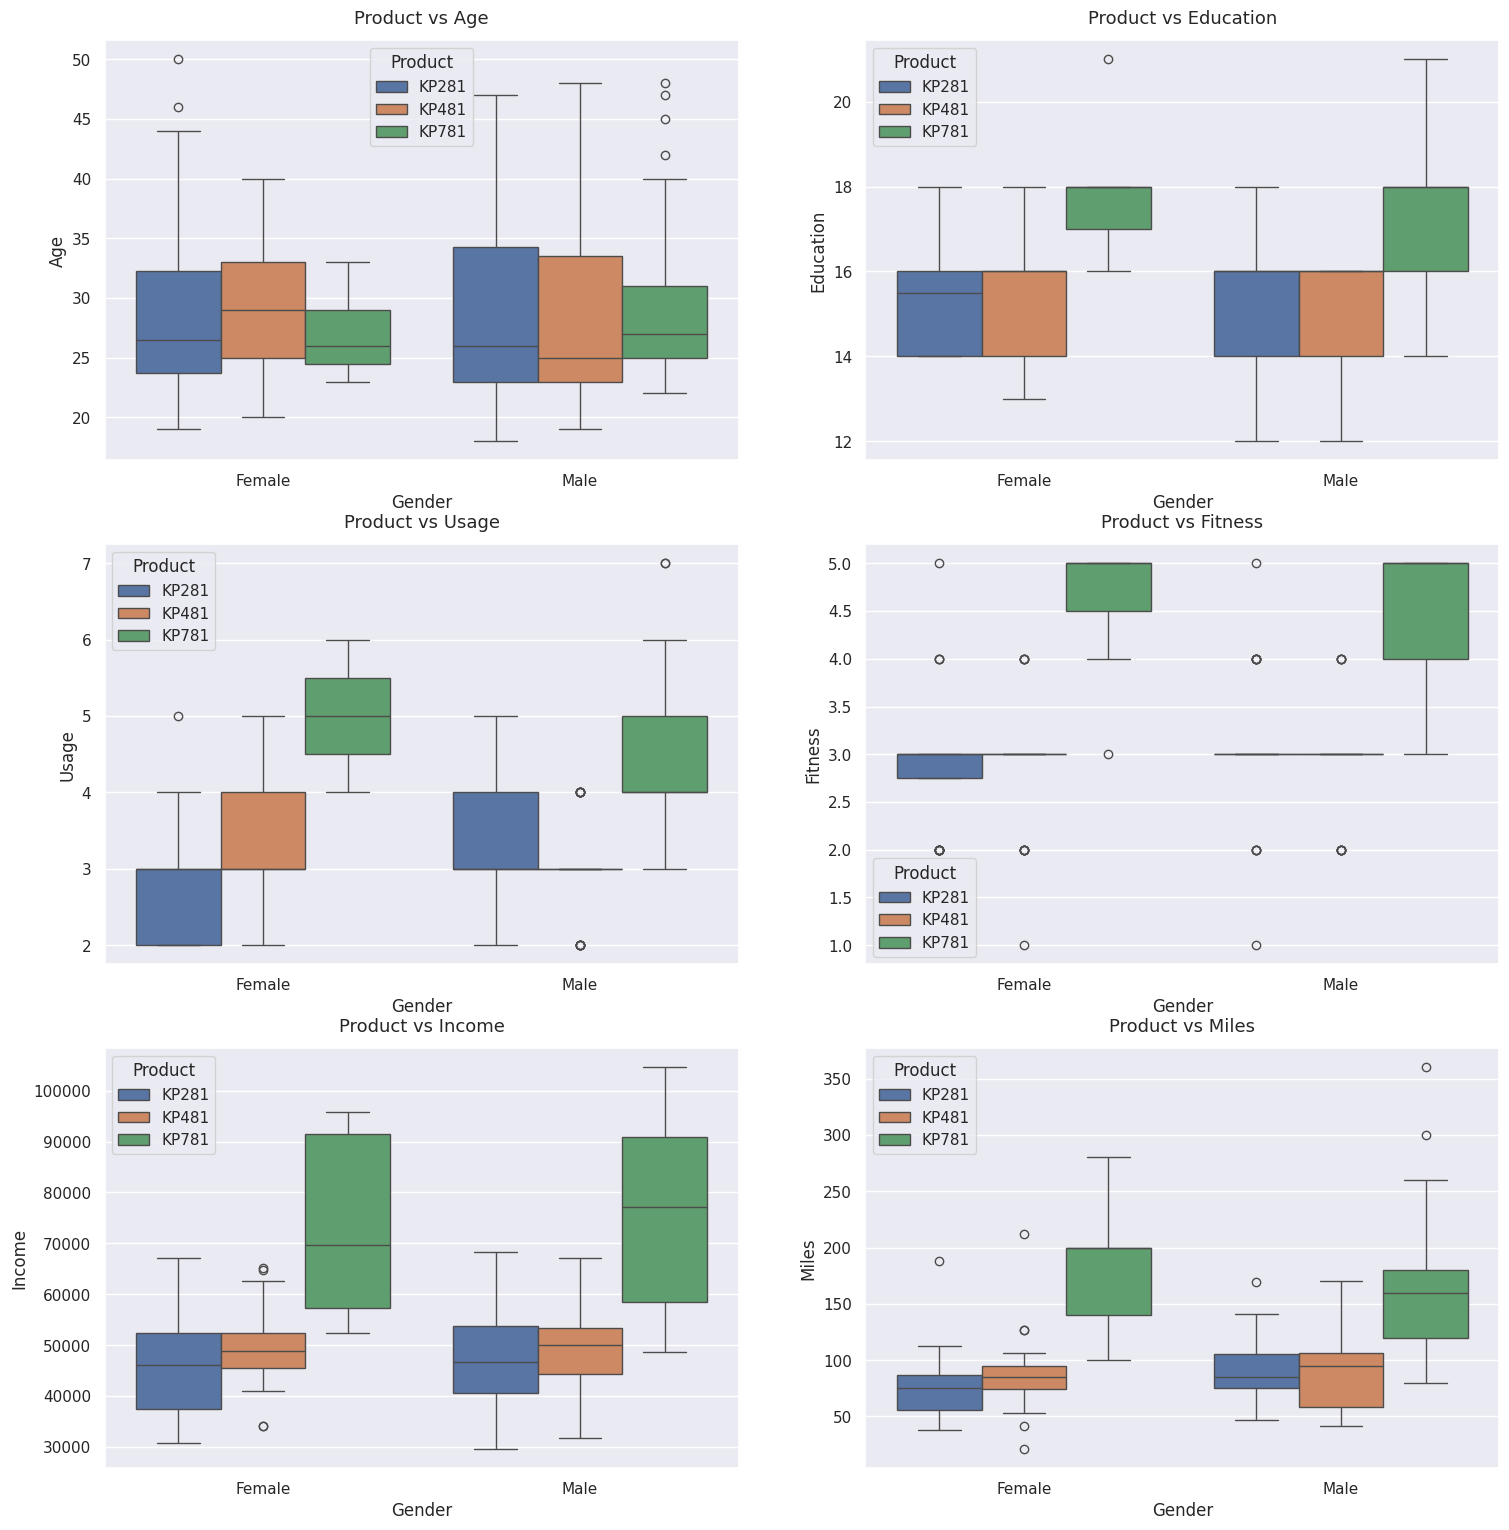

In [24]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 12))
fig.subplots_adjust(top = 1.3)

count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1


- Females planning to use the treadmill 3-4 times a week, are more likely to buy the KP481 product.

## Correlation Analysis


In [26]:
int64_columns.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [27]:
int64_columns.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


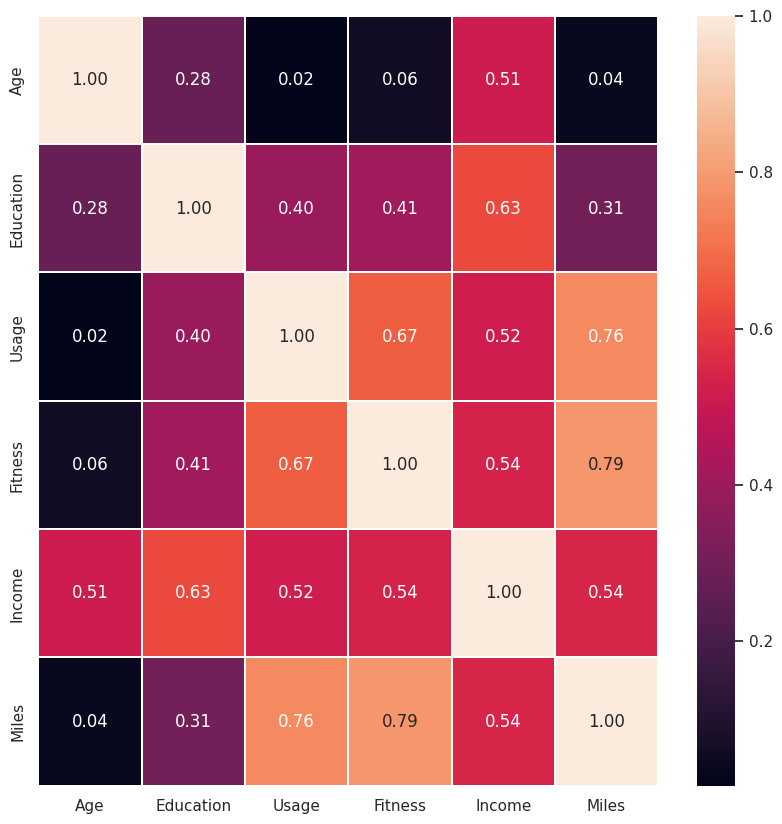

In [29]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.set(color_codes = True)
sns.heatmap(int64_columns.corr(), ax = ax, annot = True, linewidths = 0.05, fmt = '0.2f')
plt.show()

1. (Miles & Fitness) and (Miles & Usage) attributes are highly correlated, which means if a customer's fitness level is high they use more treadmills.

2. Income and Education shows a strong correlation. High-income and highly educated people prefer the KP781 treadmill which is having advanced features.

3. There is no correlation between (Usage & Age) or (Fitness & Age) attributes, which mean Age should not be a barrier to using treadmills or specific model of treadmills.

Pair Plots

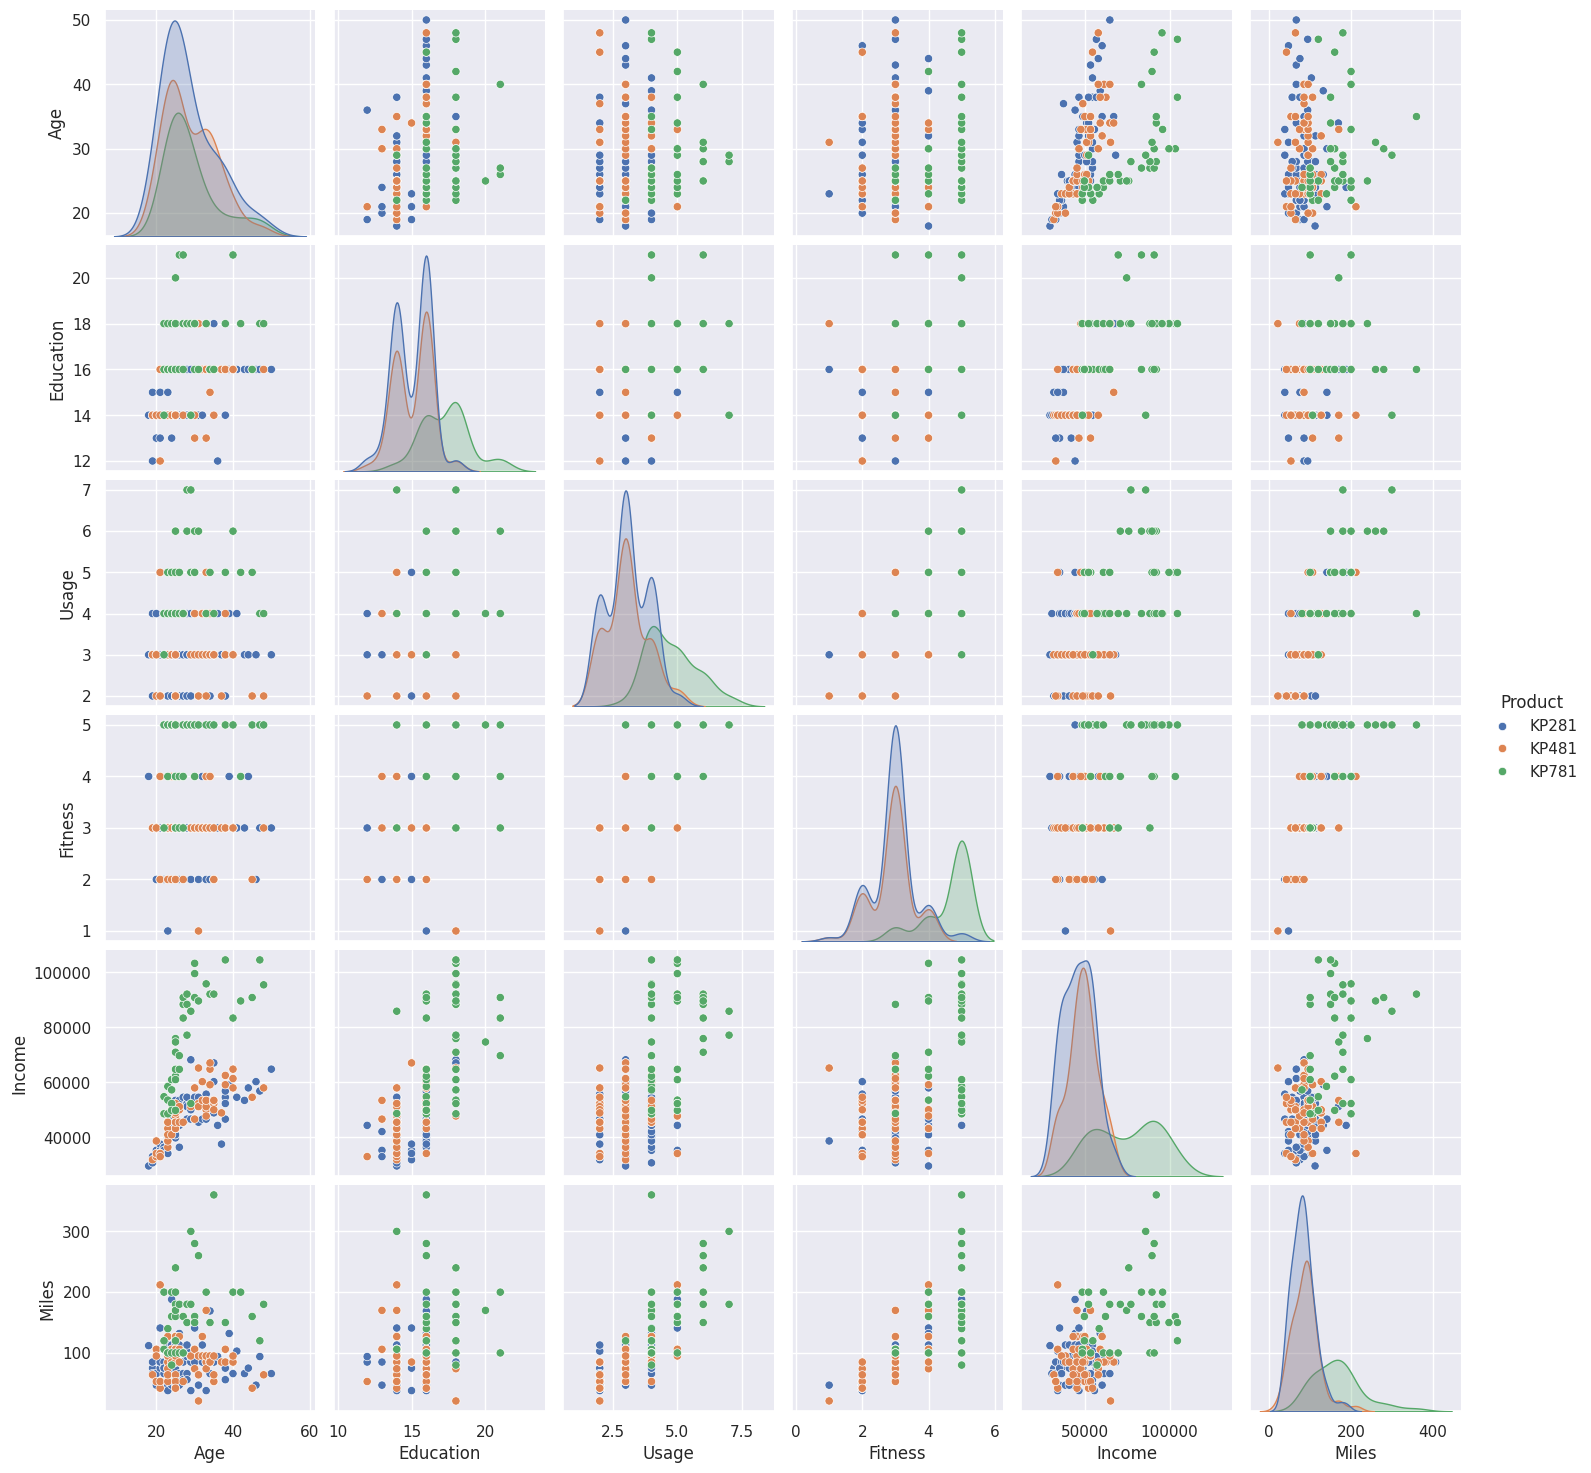

In [31]:
sns.pairplot(df, hue = "Product")
plt.show()

## Marginal & Conditional Probabilities

What percent of customers have purchased KP281, KP481, or KP781?

In [33]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1

,variable,value
0,Product,KP281
1,Product,KP281
2,Product,KP281
3,Product,KP281
4,Product,KP281
...,...,...
535,MaritalStatus,Single
536,MaritalStatus,Single
537,MaritalStatus,Single
538,MaritalStatus,Partnered


In [37]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()

In [36]:
(df1.groupby(['variable','value']).size()/len(df)).mul(100).round(3).astype(str) + '%'

variable       value    
Gender         Female       42.222%
               Male         57.778%
MaritalStatus  Partnered    59.444%
               Single       40.556%
Product        KP281        44.444%
               KP481        33.333%
               KP781        22.222%
dtype: object

**Product - Gender**

What is the probability of a customer based on Gender buying a certain treadmill Product?

In [39]:
df1_crosstab = pd.crosstab(index = df['Gender'], columns = df['Product'])
df1_crosstab

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [47]:
def p_prod_given_gender(gender, print_marginal = False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."

    df1_crosstab = pd.crosstab(index = df['Gender'], columns = df['Product'])
    p_281 = df1_crosstab['KP281'][gender] / df1_crosstab.loc[gender].sum()
    p_481 = df1_crosstab['KP481'][gender] / df1_crosstab.loc[gender].sum()
    p_781 = df1_crosstab['KP781'][gender] / df1_crosstab.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1_crosstab.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1_crosstab.loc['Female'].sum()/len(df):.2f}\n")

    print(f"P(KP281/{gender}): {p_281:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP781/{gender}): {p_781:.2f}\n")

<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-47-7d9278259f05>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
<ipython-input-47-7d9278259f05>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":


In [48]:
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



What is the probability of a customer based on MaritalStatus (Single or Partnered) buying a certain treadmill Product?

In [49]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."

    df1_crosstab2 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_281 = df1_crosstab2['KP281'][status] / df1_crosstab2.loc[status].sum()
    p_481 = df1_crosstab2['KP481'][status] / df1_crosstab2.loc[status].sum()
    p_781 = df1_crosstab2['KP781'][status] / df1_crosstab2.loc[status].sum()

    if print_marginal:
        print(f"P(Single): {df1_crosstab2.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1_crosstab2.loc['Partnered'].sum()/len(df):.2f}\n")

    print(f"P(KP281/{status}): {p_281:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")

p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-49-c9c73fe4f8b9>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
<ipython-input-49-c9c73fe4f8b9>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":


In [51]:
product_gender = pd.crosstab(index=df['Product'], columns=[df['Gender']],margins=True)
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Percentage of a Male customer purchasing a treadmill

In [52]:
prob = round((product_gender['Male']['All'] / product_gender['All']['All']),2)
pct = round(prob*100,2)
pct

58.0

Percentage of a Female customer purchasing KP781 treadmill

In [53]:
prob = round((product_gender['Female']['KP781'] / product_gender['All']['All']),2)
pct = round(prob*100,2)
pct

4.0

Probability of a customer being a Female given that Product is KP281
- P(A|B) = P(A, B)/P(B)
- P(F|KP281) = P(Female, KP281)/P(KP281)

In [54]:
prob = round((product_gender['Female']['KP281'] / product_gender['All']['KP281']),2)
pct = round(prob*100,2)
pct

50.0

- 50% of femail tend to purchase treadmill model KP281

**Product - Age**

"AgeCategory" - Teens, 20s, 30s and Above 40s <br>
"AgeGroup" - 14-20 , 20-30, 30-40 & 40-60

In [56]:
bins = [14, 19, 29, 39, 60]
labels = ["10s", "20s", "30s", "Above 40s"]
df['AgeGroup'] = pd.cut(df['Age'], bins)
df['AgeCategory'] = pd.cut(df['Age'], bins, labels = labels)
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
175,KP781,40,Male,21,Single,6,5,83416,200,"(39, 60]",Above 40s
176,KP781,42,Male,18,Single,5,4,89641,200,"(39, 60]",Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,"(39, 60]",Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(39, 60]",Above 40s
179,KP781,48,Male,18,Partnered,4,5,95508,180,"(39, 60]",Above 40s


In [60]:
product_age = pd.crosstab(index = df['Product'], columns = df['AgeCategory'], margins = True)
product_age

AgeCategory,10s,20s,30s,Above 40s,All
Product,,,,,
KP281,4,49,20,7,80
KP481,1,32,22,5,60
KP781,0,27,8,5,40
All,5,108,50,17,180


Percentage of customers with Age between 20s and 30s among all customers

In [61]:
prob = round((product_age['20s']['All'] / product_age['All']['All']),2)
pct = round(prob*100,2)
pct

60.0

- 60% of customers are between 20 and 30 years old

**Product - Income**

"IncomeCategory" - Low Income, Lower-middle Income, Upper-Middle Income and High Income

In [62]:
bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
df['IncomeCategory'] = pd.cut(df['Income'],bins_income,labels = labels_income)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 19]",10s,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 19]",10s,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 19]",10s,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 19]",10s,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(19, 29]",20s,Lower-middle Income


In [63]:
product_income = pd.crosstab(index = df['Product'], columns = df['IncomeCategory'], margins = True)
product_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


Percentage of a low-income customer purchasing a treadmill

In [64]:
prob = round(product_income['Low Income']['All'] / product_income['All']['All'], 2)
pct = round(prob*100, 2)
pct

8.0

Percentage of customer with high-income salary buying treadmill given that Product is KP781

In [65]:
prob = round(product_income['High Income']['KP781'] / product_income['All']['KP781'],2)
pct = round(prob*100,2)
pct

42.0

## Outlier Detection

Income

In [66]:
Q3 = df['Income'].quantile(0.75)
Q1 = df['Income'].quantile(0.25)
IQR = Q3 - Q1
df1 = df[(df['Income'] > Q1 - 1.5*IQR) & (df['Income'] < Q3 + 1.5*IQR)]

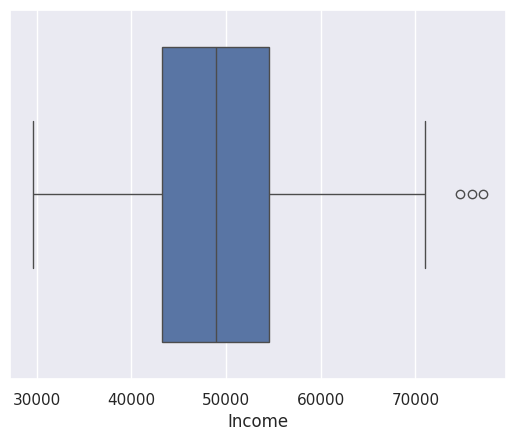

In [67]:
sns.boxplot(data=df1, x="Income", orient='h')
plt.show()

## Actionable Insights

1. Model KP281 is the best-selling product. (44.0% of all sales)
2. The majority of treadmill customers fall within the middle income bracket.
3. 88% of treadmills are purcahsed by customers aged 20 to 40.
4. Miles and Fitness & Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
5. KP781 is the only model purchased by a customer wo has more than 20 years of education and an income of over $85,000.
6. With Fitness level 4 and 5, the customers tend to use high-end treadmills and the average number of miles is above 150 per week.

## Recommendations
1. KP281 can be offered by these companies as affordable models.
2. KP781 should be marketed as a Premium Model and marketing it to high income groups and educational over 20 years market segments.
3. Also, KP781 is suited for sporty people.
4. Aerofit should conduct market research to determine if it can attract customers with income under $35,000 to expand its customer base.